# PCA and Visualizing

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
df = iris.frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(df.drop(columns=['target']))

In [9]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
df['cluster'] = km.fit_predict(iris_scaled)

In [11]:
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaled)
df['pca1'] = iris_pca[:, 0]
df['pca2'] = iris_pca[:, 1]

<Axes: xlabel='pca1', ylabel='pca2'>

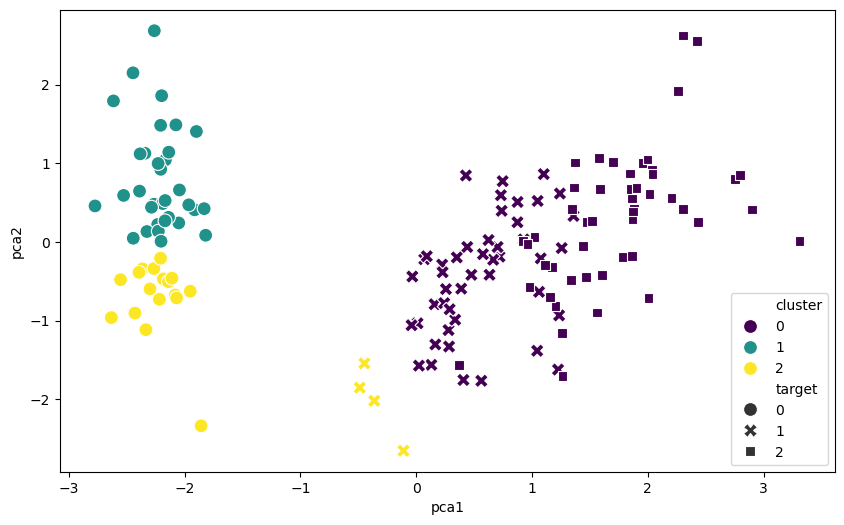

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x= 'pca1', 
    y= 'pca2',
    hue= 'cluster',
    palette='viridis',
    data=df,
    style='target',
    s=100
)

# select classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd 
import numpy as np
from sklearn.metrics import(
accuracy_score, precision_score, recall_score,
f1_score, roc_auc_score, confusion_matrix,
classification_report
)

In [ ]:
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# standardizing 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
classifiers = {
    'Logistic Regression': LogisticRegression(), 
    'Random Forest': RandomForestClassifier(),
    'Decision Tree' : DecisionTreeClassifier(), 
    'Support Vecotr Machine': SVC(),
    'K-Nearest Neighbour': KNeighborsClassifier()
}

In [ ]:
result_list = []
for name, clf in classifiers.items(): 
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    # y_proba = clf.predict_proba(X_test)[:,1] if hasattr(clf, 'predict_proba') else None 

    accuracy = accuracy_score(y_test, y_pred)
    precision =precision_score(y_test,y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    # roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan

    result_list.append({
        'Classifier' : name,
        'Accuracy':accuracy,
        'Precision': precision, 
        'Recall': recall, 
        'F1 score': f1,
        # 'ROC-AUC': roc_auc
    })
results = pd.DataFrame(result_list)
results


In [ ]:
for name, clf in classifiers.items():
    y_pred = clf.predict(X_test)
    print(f'\n {name} classification report: \n')
    print(classification_report(y_test, y_pred))

# Select regressor

In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
house = fetch_california_housing()
X = pd.DataFrame(house.data, columns=house.feature_names)
y = house.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

In [ ]:
regressors = {
    'Linear Regression': LinearRegression(),
    'Random Forest':RandomForestRegressor(), 
    'Decision Tree': DecisionTreeRegressor(), 
    'K-Nearest Regressor': KNeighborsRegressor(),
    'Support Vector Regressor':SVR()
}

In [ ]:
results_list = []

In [180]:
results_list = []  # Corrected variable name

for name, reg in regressors.items():
    reg.fit(X_train, y_train)  # Train the regressor
    y_pred = reg.predict(X_test)  # Make predictions on the test set

    # Calculate regression metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)  # Fixed typo (was 'rsme' in the original)

    # Append results for this regressor
    results_list.append({
        "Regressor": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    })

# Create and display the sorted results DataFrame
results = pd.DataFrame(results_list)
results.sort_values(by="R2", ascending=False)


,Regressor,MAE,MSE,RMSE,R2
1,Random Forest,0.328803,0.254563,0.504543,0.805738
2,Decision Tree,0.455627,0.499957,0.707076,0.618473
0,Linear Regression,0.533200,0.555892,0.745581,0.575788
3,K-Nearest Regressor,0.812798,1.118682,1.057678,0.146310
4,Support Vector Regressor,0.859951,1.332012,1.154128,-0.016485


# Select but clustering

In [360]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import numpy as np 
import pandas as pd 
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [362]:
X, _ = make_blobs(n_samples=1000, centers=4, cluster_std=1.0, random_state=42)

In [364]:
clustering_algorithms = {
    'Kmeans': KMeans(n_clusters=4, random_state=42),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5), 
    'Aggalomerative Clustering': AgglomerativeClustering(n_clusters=4)
}

In [366]:
results = []
for name, algorithm in cluistering_algorithms.items(): 
    model = algorithm.fit(X)
    labels = model.labels_ if hasattr(model, 'labels_') else model.predic(X) 

    if len(np.unique(labels)) > 1: 
        silhouette = silhouette_score(X, labels)
        davies_bouldin = davies_bouldin_score(X, labels)
        calinski_harabasz = calinski_harabasz_score(X, labels)

    results.append({
        'Algorithm': name, 
        'Silhouette': silhouette, 
        'Davies Bouldin': davies_bouldin,
        'Calinkshi harabasz': calinski_harabasz
    })
result_df = pd.DataFrame(results)
result_df.sort_values(by='Silhouette', ascending=False)

,Algorithm,Silhouette,Davies Bouldin,Calinkshi harabasz
0,K-means,0.791598,0.292330,11066.971284
2,Alggomerative Clusterng,0.791598,0.292330,11066.971284
1,DBSCAN,0.497161,1.288477,2012.072392
